Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

Для начала импортируются все необходимые билиотеки

In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
from scipy import stats as st
import matplotlib.pyplot as plt

На следующем шаге необходимо считать датасеты

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df3 = pd.read_csv('/datasets/query_3.csv')

Начинаю изучать первый датасет на наличие ошибок. Ниже представленно его содержимое (8 строк, поэтому не использовался метод head())

In [3]:
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Далее отображается информация о датасете, из которой можно сделать вывод: тип данных для признака model неподходящая

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Меняю тип данных для признака model на строковую

In [5]:
df1['model'] = df1['model'].astype(str)

Просмариваю содержимое второго датасета (первые 5 элементов)

In [6]:
df3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


С этим датасетом такая же беда: строковый признак имеет тип данных object

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Соответсвенно его необходимо изменить на str

In [8]:
df3['city'] = df3['city'].astype(str)

Далее я проверяю, не повторяются ли города в этом датасете. Количество уникальных городов равно количеству строк в наборе данных, а значит все хорошо 

In [9]:
len(df3['city'].unique())

101

Создаю отдельный датасет с топ-10 городов по прилетающим рейсам

In [10]:
df3_sorted = df3.sort_values('average_flights', ascending=False).head(10)

Убеждаюсь что все хорошо:)

In [11]:
df3_sorted

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Просматриваю все доступные ключчи для rcParams. С ним мне удобнее работать)

In [12]:
rcParams.keys()

/opt/conda/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

Строю график для отображения загруженности моделей самолетов

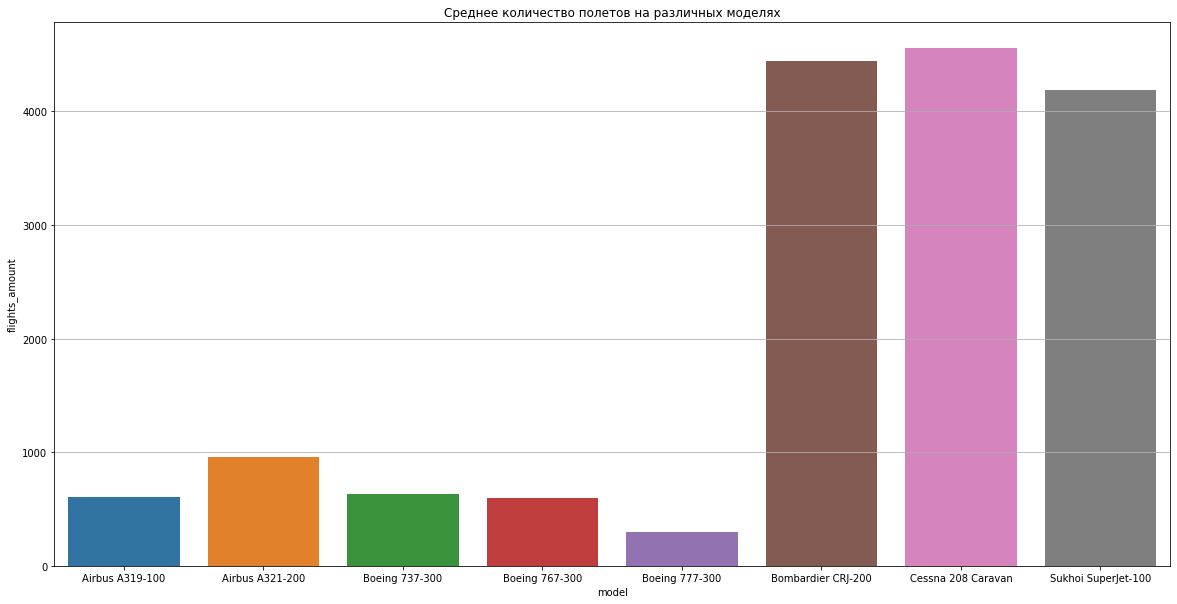

In [13]:
rcParams['figure.figsize'] = 20, 10
rcParams['axes.grid'] = True
plt.title("Среднее количество полетов на различных моделях")
sns.barplot(x="model", y="flights_amount", data=df1)

**Выводы**

1. Наиболее востребованная модель самолетов - Cessna 208 Caravan
2. Немногим этой модели уступают Bombardier CRJ-200 и Sukhoi Superjet-100
3. Менее востребованная модель - Boeing 777-300
4. На графике видно четкое разделение моделей на две группы (до 1000 полетов и более 1000)

Далее строится график среднего количества прилетов в города. Строю перевернутую набок диаграмму для лучшей визуализации

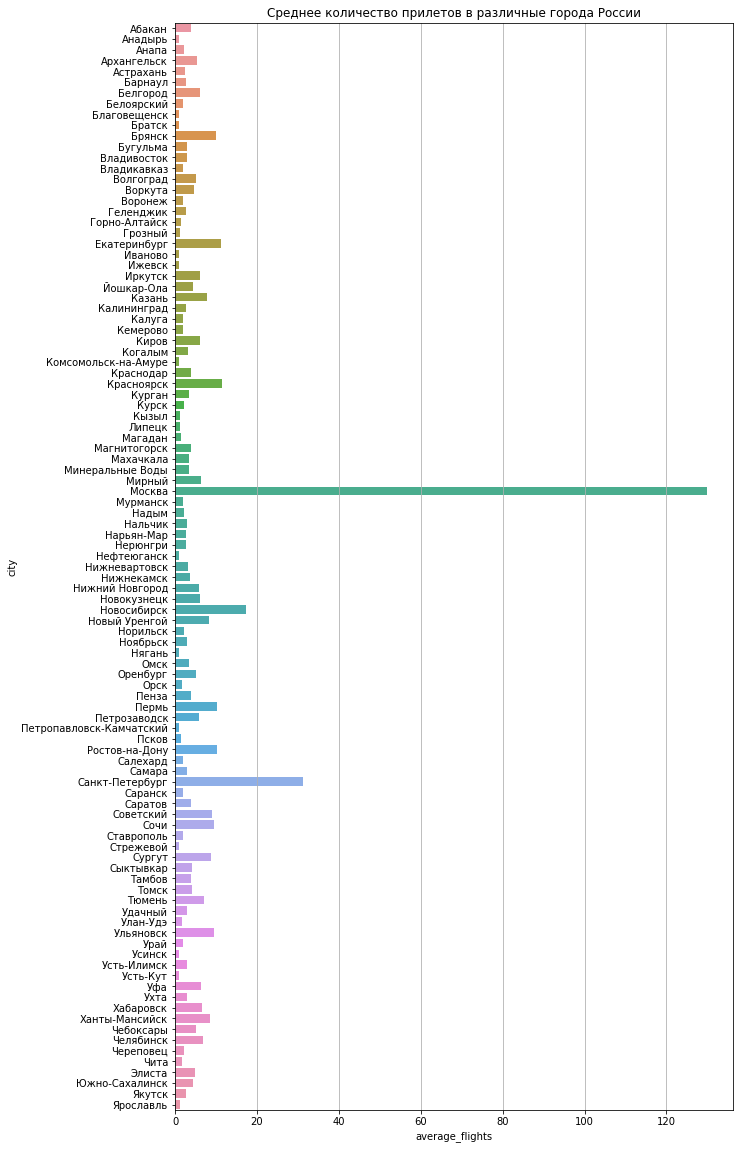

In [14]:
rcParams['figure.figsize'] = 10, 20
plt.title("Среднее количество прилетов в различные города России")
sns.barplot(y="city", x="average_flights", data=df3)

**Выводы**

1. Наиболее популярный для прилета город - Москва
2. Санкт-Петербург и Москва единственные имеют более 20 прилетов в среднем
3. Москва является сильным выбросом по сравнению с другими городами

Далее строится график для топ-10 популярных городов по прилетам в среднем

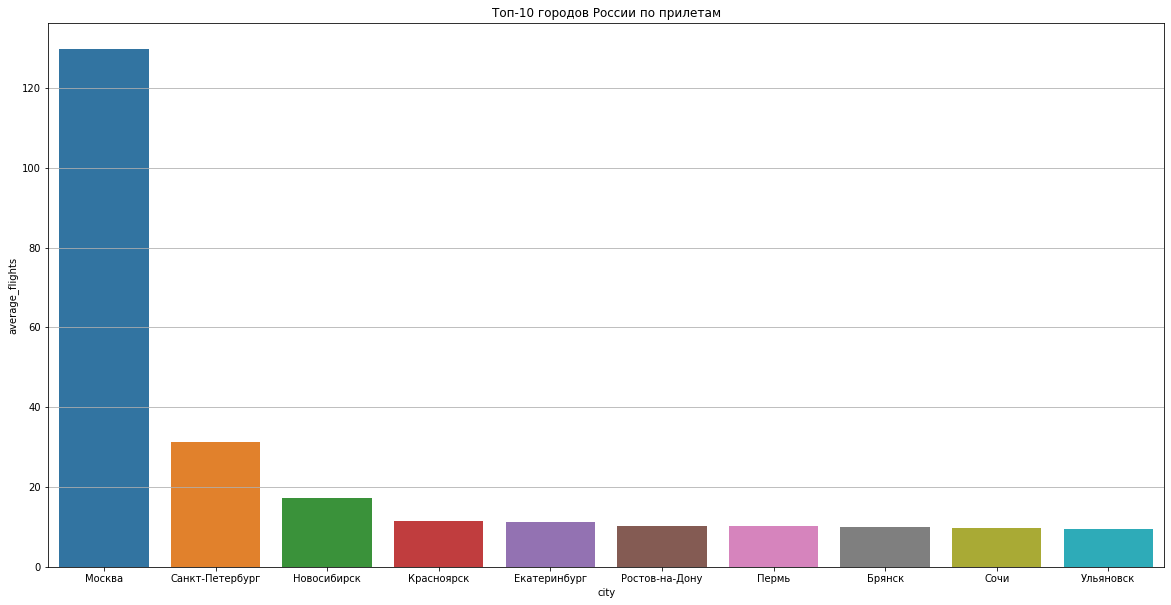

In [15]:
rcParams['figure.figsize'] = 20, 10
plt.title("Топ-10 городов России по прилетам")
sns.barplot(x="city", y="average_flights", data=df3_sorted)

**Выводы**

1. Лидером является Москва, мньше всего прилетают в Ульяновск и Сочи
2. В лидирующих позициях обосновались города-милионники

### Выводы

1. Данные считаны, исправлена проблема с типом данных
2. Создан датасет, включающий в себя топ-10 городов по прилетам
3. Согласно заданию построены графики и каждый график имее свой вывод

# 2. Проверка гипотезы

Считываю датасет для проверки гипотезы

In [16]:
df = pd.read_csv('/datasets/query_last.csv')

Смотрю информацию о датасете

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [18]:
df

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Заполняю пропуски значением -1 для простой разбивки

In [19]:
df.fillna(-1, inplace=True)

Формулирую гиптоезы

**H0:** Средний спрос на билеты во время фестивалей больше среднего спроса на билеты в обычное время

**H1 (альтернативная):** Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

Разбиваю данные на две выборки

In [20]:
festival_day_ticket_mean = df.query('festival_week > 0')
not_festival_day_ticket_mean = df.query('festival_week < 0')

Проверяю гипотезу

In [21]:
alpha = 0.05

results = st.mannwhitneyu(
     festival_day_ticket_mean['ticket_amount'],
     not_festival_day_ticket_mean['ticket_amount'],
     alternative='two-sided'                         ВОТ ЭТО ПАРАМЕТР ЕЩЁ НАДО ДОБАВИТЬ
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha) and (festival_day_ticket_mean['ticket_amount'].mean() < festival_day_ticket_mean['ticket_amount'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Не получилось отвергнуть нулевую гипотезу


In [75]:
# alpha = 0.05

# results = st.ttest_ind(
#      festival_day_ticket_mean['ticket_amount'],
#      not_festival_day_ticket_mean['ticket_amount']
   
#     )

# print('p-значение:', results.pvalue)

# if (results.pvalue < alpha) and (festival_day_ticket_mean['ticket_amount'].mean() < festival_day_ticket_mean['ticket_amount'].mean()):
#     print("Отвергаем нулевую гипотезу")
# else:
#     print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


### Выводы
Данных для проверки статистической зависимости крайне мало, поэтому эта задача проверяет лишь умение пользоватьсяс инструментом.
Так как в данном примере был предоставлен количественный тип данных для анализа, данные имеют нормальное распределение, исследуемые группы независимы и таких групп две то следовательно проводить проверку гипотез следует методом Стъюдента, который **не смог опровергнуть нулевую гипотезу**